<a href="https://colab.research.google.com/github/malekebenhassine/hello-world/blob/main/Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [1]:
!pip install matplotlib-venn

In [2]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [3]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.4_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.4) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.4) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=c895f2e4dcb03eace3bf99ce2ca74f9db8ad48cf8a55ec2833dca85f37e68d9a
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [4]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [1]:
!pip install azureml-core

In [5]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 62.5 MB/s eta 0:00:00


In [5]:
import pandas as pd

# Charger le CSV dans un DataFrame
df = pd.read_csv('data2.csv')

# Vérifier un aperçu des données
df.head()


,ClientID,ProductNo,Somme de Montant_total_facture,Somme de Montant_recu,Somme de Reste_a_recouvrer,Payment_Method,Somme de Retard_jours,NatureCreance,Statut,Type_Creance,Alerte_Retard,Somme de Cible_Risque
0,CL000057,ARFIXREX19A01,1918.480000,1918.480000,0.000000,CHQ,6,Normal,Payé,Standard,✅ À temps ou léger,0
1,CL000044,ARRACCIS18A01,676597.446000,34890.978333,641706.467667,VIR,532,Normal,Payé,Standard,🔴 Retard critique,1
2,CL000044,ARRACCIS20A01,997549.281667,99754.913333,897794.368333,VIR,790,Normal,Payé,Standard,🔴 Retard critique,1
3,CL000035,ASARC000SIT01,661.724667,661.724667,0.000000,CHQ,98,Normal,Payé,Standard,🟠 Retard important,0
4,CL000041,ASARC000SIT01,738.500000,738.500000,0.000000,CHQ,11,Normal,Payé,Standard,✅ À temps ou léger,0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Séparer X et y
X = df.drop('Somme de Cible_Risque', axis=1)
y = df['Somme de Cible_Risque']

# Diviser les données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Sauvegarder le modèle (sans dépendance Azure)
joblib.dump(model, 'rf_model.pkl')


ValueError: could not convert string to float: 'CL000393'

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128992 (\N{L

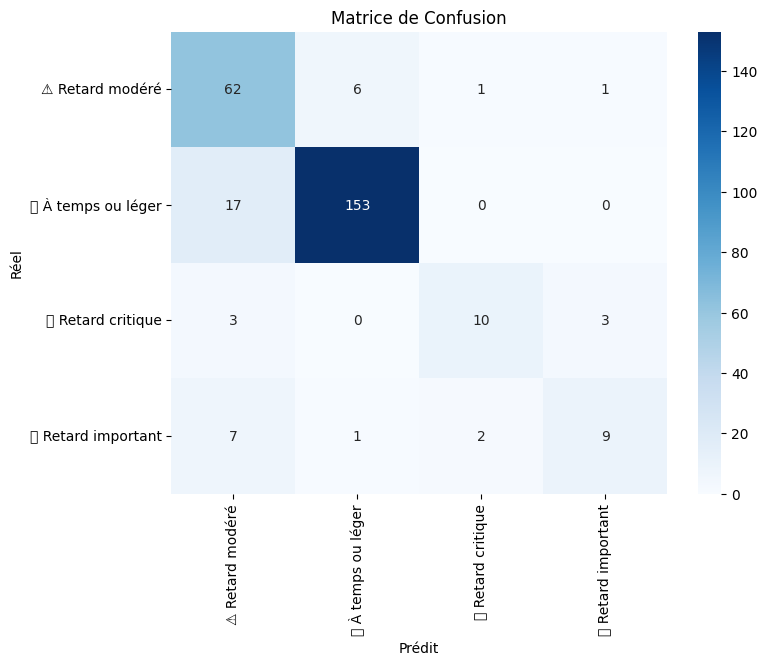

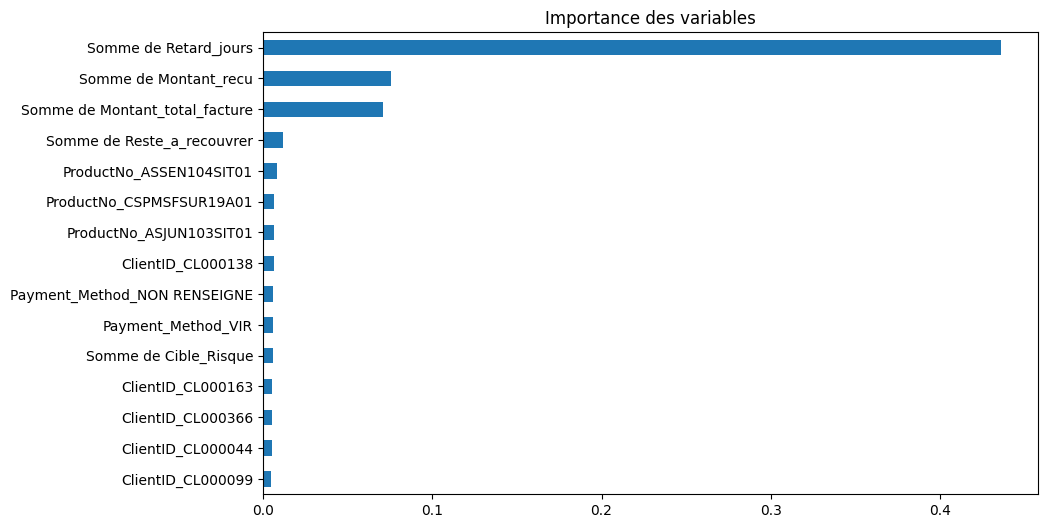

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# Importance des features
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp[:15].plot(kind='barh')
plt.title('Importance des variables')
plt.gca().invert_yaxis()
plt.show()


In [7]:
df.dtypes



,0
ClientID,object
ProductNo,object
Somme de Montant_total_facture,float64
Somme de Montant_recu,float64
Somme de Reste_a_recouvrer,float64
Payment_Method,object
Somme de Retard_jours,int64
NatureCreance,object
Statut,object
Type_Creance,object


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Charger les données
df = pd.read_csv('data2.csv')

# Séparer X et y
X = df.drop('Somme de Cible_Risque', axis=1)
y = df['Somme de Cible_Risque']

# Encoder les colonnes object
cat_cols = X.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1

    accuracy                           0.99       275
   macro avg       0.33      0.33      0.33       275
weighted avg       0.98      0.99      0.98       275



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# Compter le nombre de lignes par classe
y.value_counts()


,count
Somme de Cible_Risque,
0,1348
1,22
2,1


In [10]:
df['Alerte_Retard'].value_counts()


,count
Alerte_Retard,
✅ À temps ou léger,849
⚠️ Retard modéré,351
🟠 Retard important,94
🔴 Retard critique,77


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Charger les données
df = pd.read_csv('data2.csv')

# Encoder la colonne 'Alerte_Retard'
le = LabelEncoder()
df['Alerte_Retard_encoded'] = le.fit_transform(df['Alerte_Retard'])

# Afficher le mapping
print("Mapping des classes Alerte_Retard :", dict(zip(le.classes_, le.transform(le.classes_))))

# Définir X et y
X = df.drop(['Alerte_Retard', 'Alerte_Retard_encoded'], axis=1)  # Exclure la cible et la colonne encodée pour éviter le doublon
X = pd.get_dummies(X, drop_first=True)  # Encoder les variables catégoriques restantes

y = df['Alerte_Retard_encoded']

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Créer le modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=le.classes_))


Mapping des classes Alerte_Retard : {'⚠️ Retard modéré': np.int64(0), '✅ À temps ou léger': np.int64(1), '🔴 Retard critique': np.int64(2), '🟠 Retard important': np.int64(3)}
                    precision    recall  f1-score   support

  ⚠️ Retard modéré       0.70      0.89      0.78        70
✅ À temps ou léger       0.96      0.90      0.93       170
 🔴 Retard critique       0.77      0.62      0.69        16
🟠 Retard important       0.69      0.47      0.56        19

          accuracy                           0.85       275
         macro avg       0.78      0.72      0.74       275
      weighted avg       0.86      0.85      0.85       275



In [14]:
import pandas as pd

# Upload du fichier depuis ton ordi
from google.colab import files
uploaded = files.upload()


Saving data3.csv to data3.csv


In [17]:
df = pd.read_csv('data3.csv')  # Remplace par le vrai nom
df.head()

,ClientID,ProductNo,Somme de Montant_total_facture,Somme de Montant_recu,Somme de Reste_a_recouvrer,Payment_Method,Somme de Retard_jours,NatureCreance,Statut,Type_Creance,Alerte_Retard
0,CL000148,SRDEPXXXSIT01,219.700000,219.700000,0.0,VIR,1229,Normal,Payé,Standard,🔴 Retard critique
1,CL000458,SRDEPXXXSIT01,265.966667,265.966667,0.0,VIR,11,Normal,Payé,Standard,✅ À temps ou léger
2,CL000439,SERDEPLC11A01,2166.866667,1166.866667,1000.0,NON RENSEIGNE,112,Normal,Payé,Standard,🟠 Retard important
3,CL000435,SERACLEN22A06,40267.000000,40267.000000,0.0,VIR,1,Normal,Payé,Standard,✅ À temps ou léger
4,CL000063,SERACLEN22A04,271629.705667,271629.705667,0.0,VIR,7,Normal,Payé,Standard,✅ À temps ou léger


In [18]:
df.shape  # Renvoie (nb_lignes, nb_colonnes)



(1371, 11)

In [19]:
df.dtypes  # Vérifie les types de données


,0
ClientID,object
ProductNo,object
Somme de Montant_total_facture,float64
Somme de Montant_recu,float64
Somme de Reste_a_recouvrer,float64
Payment_Method,object
Somme de Retard_jours,int64
NatureCreance,object
Statut,object
Type_Creance,object


In [20]:
# Mapping des classes
mapping = {
    '✅ À temps ou léger': 1,
    '⚠️ Retard modéré': 0,
    '🔴 Retard critique': 2,
    '🟠 Retard important': 3
}

df['Alerte_Retard_Encoded'] = df['Alerte_Retard'].map(mapping)

# Vérifier la distribution
df['Alerte_Retard_Encoded'].value_counts()


,count
Alerte_Retard_Encoded,
1,849
0,351
3,94
2,77


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Charger les données
df = pd.read_csv('data3.csv')  # Remplace par le nom exact

# Séparer X (features) et y (target)
X = df.drop(['Alerte_Retard', 'Alerte_Retard_Encoded'], axis=1)  # Les variables explicatives
y = df['Alerte_Retard_Encoded']  # La cible

# Vérifier
print("X shape:", X.shape)
print("y shape:", y.shape)


KeyError: "['Alerte_Retard_Encoded'] not found in axis"

In [24]:
# Mapping des classes
mapping = {'⚠️ Retard modéré': 0, '✅ À temps ou léger': 1, '🔴 Retard critique': 2, '🟠 Retard important': 3}
df['Alerte_Retard_Encoded'] = df['Alerte_Retard'].map(mapping)
X = df.drop(['Alerte_Retard', 'Alerte_Retard_Encoded'], axis=1)
y = df['Alerte_Retard_Encoded']


In [25]:
X = df.drop(['Alerte_Retard', 'Alerte_Retard_Encoded'], axis=1)
y = df['Alerte_Retard_Encoded']


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Charger les données
df = pd.read_csv('data3.csv')  # Remplace par le nom exact

# Vérifier
print("X shape:", X.shape)
print("y shape:", y.shape)
mapping = {'⚠️ Retard modéré': 0, '✅ À temps ou léger': 1, '🔴 Retard critique': 2, '🟠 Retard important': 3}
df['Alerte_Retard_Encoded'] = df['Alerte_Retard'].map(mapping)
X = df.drop(['Alerte_Retard', 'Alerte_Retard_Encoded'], axis=1)
y = df['Alerte_Retard_Encoded']


X shape: (1371, 10)
y shape: (1371,)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1096, 10)
X_test shape: (275, 10)
y_train shape: (1096,)
y_test shape: (275,)


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialiser le modèle
model = RandomForestClassifier(random_state=42)

# Entraîner
model.fit(X_train, y_train)

# Prédictions sur le test
y_pred = model.predict(X_test)

# Évaluer
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


ValueError: could not convert string to float: 'CL000305'

In [33]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


In [34]:
from catboost import CatBoostClassifier

# Identifier les colonnes catégorielles (type object)
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Créer le modèle
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=50
)

# Entraîner
model.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_test, y_test))

# Prédictions
y_pred = model.predict(X_test)

# Évaluer
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


0:	learn: 1.1911991	test: 1.1915015	best: 1.1915015 (0)	total: 82.8ms	remaining: 16.5s
50:	learn: 0.2449475	test: 0.2967249	best: 0.2967249 (50)	total: 1.3s	remaining: 3.79s
100:	learn: 0.1712785	test: 0.2412493	best: 0.2412493 (100)	total: 2.38s	remaining: 2.33s
150:	learn: 0.1349223	test: 0.2259654	best: 0.2259654 (150)	total: 3.02s	remaining: 979ms
199:	learn: 0.1130475	test: 0.2247569	best: 0.2243040 (158)	total: 3.63s	remaining: 0us

bestTest = 0.2243040329
bestIteration = 158

Shrink model to first 159 iterations.
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        70
           1       0.97      0.94      0.95       170
           2       1.00      0.88      0.93        16
           3       0.77      0.89      0.83        19

    accuracy                           0.92       275
   macro avg       0.89      0.90      0.89       275
weighted avg       0.92      0.92      0.92       275

[[ 62   4   0   4]
 [ 10 159   0   1]
 

In [35]:
model.save_model('model_catboost.cbm')


In [36]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.load_model('model_catboost.cbm')
